In [1]:
# Taken from: https://blog.keras.io/building-autoencoders-in-keras.html

In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
encoding_dim = 32  

# This is our input image
input_img = tf.keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = tf.keras.layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = tf.keras.Model(input_img, decoded)

In [6]:
encoder = tf.keras.Model(input_img, encoded)

In [7]:
# This is our encoded (32-dimensional) input
encoded_input = tf.keras.Input(shape=(encoding_dim,))

# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# Create the decoder model
decoder = tf.keras.Model(encoded_input, decoder_layer(encoded_input))

In [8]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [10]:
# Loading the data
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

In [14]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:]))) # <- reshaping them to flatten the image
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:]))) # <- reshaping them to flatten the image
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [19]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 1s 2ms/step - loss: 0.0041 - val_loss: 0.0042
Epoch 2/50
235/235 [==============================] - 1s 2ms/step - loss: 0.0041 - val_loss: 0.0042
Epoch 3/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0041 - val_loss: 0.0042
Epoch 4/50
235/235 [==============================] - 1s 2ms/step - loss: 0.0041 - val_loss: 0.0042
Epoch 5/50
235/235 [==============================] - 1s 2ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 6/50
235/235 [==============================] - 1s 2ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 7/50
235/235 [==============================] - 1s 2ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 8/50
235/235 [==============================] - 1s 2ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 9/50
235/235 [==============================] - 1s 2ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 10/50
235/235 [==============================] - 1s 2ms/step - loss: 0.0041 - val_loss: 0.0041

In [20]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

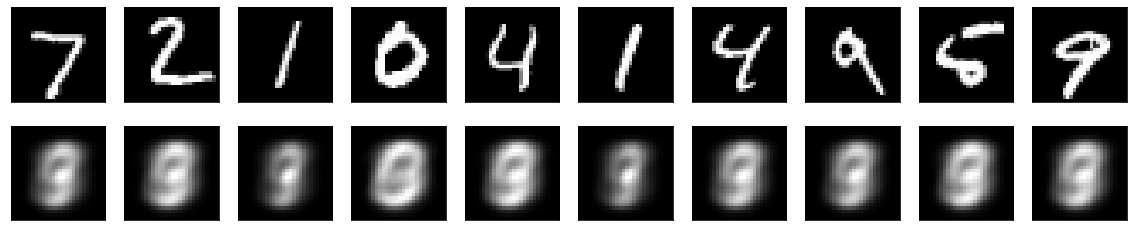

In [22]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
